<a href="https://colab.research.google.com/github/Hacxmr/log-analysis/blob/main/Supervised_NSLKDDipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving kdd_dataset.csv to kdd_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df = pd.read_csv('kdd_dataset.csv')
print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,1,0,udp,other,SF,146,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,2,0,tcp,private,S0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,3,0,tcp,http,SF,232,8153,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,4,0,tcp,http,SF,199,420,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
df.isnull().sum()


,0
Unnamed: 0,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0


In [5]:
cat_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8932467007810396
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80        38
           1       0.64      0.53      0.58        30
           2       0.62      0.59      0.60        22
           3       0.64      0.50      0.56        36
           4       0.64      0.44      0.52        36
           5       0.43      0.35      0.39        37
           6       0.59      0.59      0.59        51
           7       0.62      0.58      0.60        73
           8       0.53      0.62      0.57        47
           9       0.63      0.62      0.62        60
          10       0.68      0.56      0.61        90
          11       0.77      0.84      0.80       220
          12       0.75      0.68      0.71       243
          13       0.63      0.62      0.63       194
          14       0.72      0.73      0.73       282
          15       0.84      0.85      0.85      1033
          16       0.71     

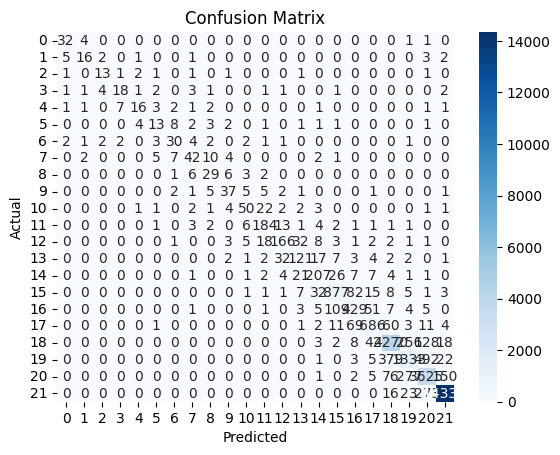

In [11]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_high_var = selector.fit_transform(X)


In [13]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:56:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8728790735254511
